<a href="https://colab.research.google.com/github/M2kishore/Machine-Learning/blob/main/CB_EN_U4CSE19127_Lab_12_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Lab

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading Data and imputing

In [118]:
df = pd.read_csv("https://raw.githubusercontent.com/M2kishore/Machine-Learning/main/Chronic_Kidney_Disease.csv")
df.dropna(inplace=True)
print(df.shape)
df_col = df.columns
df_col

(158, 26)


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

## Encoding

In [119]:
df = pd.get_dummies(df)
df

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc_abnormal,rbc_normal,pc_abnormal,pc_normal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,pcv_16,pcv_20,pcv_22,pcv_23,pcv_24,pcv_25,pcv_26,pcv_28,pcv_29,pcv_30,pcv_31,pcv_32,pcv_33,pcv_34,pcv_35,pcv_36,pcv_37,pcv_39,pcv_40,pcv_41,...,rc_4,rc_4.1,rc_4.2,rc_4.3,rc_4.5,rc_4.6,rc_4.7,rc_4.8,rc_4.9,rc_5.0,rc_5.1,rc_5.2,rc_5.3,rc_5.4,rc_5.5,rc_5.6,rc_5.7,rc_5.8,rc_5.9,rc_6.0,rc_6.1,rc_6.2,rc_6.3,rc_6.4,rc_6.5,rc_8.0,htn_no,htn_yes,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,class_ckd,class_notckd
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
9,9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,1,0
11,11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
14,14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0
20,20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1


In [120]:
df = df.drop('class_notckd',axis=1)
df = df.drop('id',axis=1)

## Getting X and Y 

In [121]:
X = df.drop(['class_ckd'], axis = 1)
Y = df['class_ckd'].values

## Decomposing excess Features by PCA feature Extraction

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X = pca.fit_transform(X)

## Train Test split

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Visualizing datapoints in 2D

In [124]:
Xdf = pd.DataFrame(X)
Xdf["class"] = Y

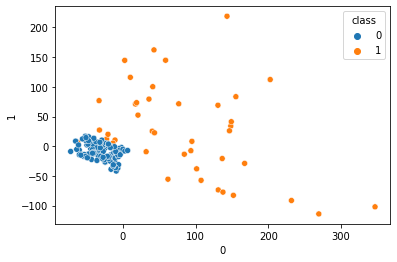

In [125]:
sns.scatterplot(data=Xdf, x=0, y=1, hue="class")

# 2D perceptron prediction from scratch
prediction function

In [126]:
def isCKD(row, weights):
  #loading bias
  activation = weights[0]
  for i in range(len(row)-1):
    activation += weights[i+1]*row[i]
  if activation >= 0:
    return 1
  return 0

In [135]:
def generate_weights(data, rate, epoch):
	weights = [0.0 for i in range(len(data[0]))]
	for epoch in range(epoch):
		sum_error = 0.0
		for row in data:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + rate * error * row[i]
		print('epoch=%d, lrate=%.3f, error=%d' % (epoch, rate, sum_error))
	return weights

In [133]:
x = Xdf.values
weights = generate_weights(data=x,rate=1,epoch=15)
y_pred = []
y_actual = []
for row in x:
  prediction = isCKD(row, weights)
  y_actual.append(row[-1])
  y_pred.append(prediction)

>epoch=0, lrate=1.000, error=3
>epoch=1, lrate=1.000, error=10
>epoch=2, lrate=1.000, error=7
>epoch=3, lrate=1.000, error=7
>epoch=4, lrate=1.000, error=6
>epoch=5, lrate=1.000, error=6
>epoch=6, lrate=1.000, error=8
>epoch=7, lrate=1.000, error=8
>epoch=8, lrate=1.000, error=8
>epoch=9, lrate=1.000, error=7
>epoch=10, lrate=1.000, error=7
>epoch=11, lrate=1.000, error=2
>epoch=12, lrate=1.000, error=0
>epoch=13, lrate=1.000, error=0
>epoch=14, lrate=1.000, error=0


In [134]:
accuracy_score(y_actual,y_pred)

1.0

# Perceptron using library

In [130]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X,Y)
clf.score(X,Y)

1.0